<a href="https://colab.research.google.com/github/harsh-seth/deep-learning-experiments/blob/main/PyTorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Linear Regression - from scratch ##

# fn to learn: y = 1*x1 + 2*x2

x = torch.Tensor([
  [1, 1],
  [2, 3],
  [3, 2],
  [4, 1]
])
y = torch.Tensor([
  [3],
  [8],
  [7],
  [6]
])

# params
w = torch.randn(size=(x.shape[1] + 1, 1), requires_grad=True)

# operations
def forward(x):
  return torch.matmul(x, w[1:]) + w[0]

cost = lambda a, b: ((a - b)**2).mean()
optimizer = lambda w, learning_rate: w.sub_(learning_rate * w.grad) # w.grad will only be populated if w is a leaf node. i.e. ensure that the same variable persists (by in-place operations like -= or .sub_()), even if the value has updated. Alternatively, w = w - num;  w.requires_grad_()

In [3]:
# hypers
learning_rate = 1e-2
epochs = 100


with torch.no_grad():
  print(f'Prediction (before training): {forward(torch.Tensor([3, 3]))} (Actual: {9})')

for epoch in range(0, epochs):
  pred = forward(x)
  loss = cost(pred, y)
  loss.backward()
  with torch.no_grad():
    optimizer(w, learning_rate)
  w.grad.zero_()

  if (epoch + 1) % 10 == 0:
    print(f'[Epoch {epoch + 1}] loss: {loss}')

with torch.no_grad():
  print(f'Prediction (after training): {forward(torch.Tensor([3, 3]))} (Actual: {9})')


Prediction (before training): tensor([4.7325]) (Actual: 9)
[Epoch 10] loss: 2.268909215927124
[Epoch 20] loss: 1.5940425395965576
[Epoch 30] loss: 1.1596254110336304
[Epoch 40] loss: 0.8658140897750854
[Epoch 50] loss: 0.6662055850028992
[Epoch 60] loss: 0.5298241972923279
[Epoch 70] loss: 0.4359021782875061
[Epoch 80] loss: 0.37051838636398315
[Epoch 90] loss: 0.3243364691734314
[Epoch 100] loss: 0.29109692573547363
Prediction (after training): tensor([8.2400]) (Actual: 9)


In [4]:
## linear regression - from pytorch's modules ##
class LinearRegression(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.lin1 = nn.Linear(in_features, out_features)

  def forward(self, x):
    return self.lin1(x)

In [5]:
# fn to learn: y = 1*x1 + 2*x2

x = torch.Tensor([
  [1, 1],
  [2, 3],
  [3, 2],
  [4, 1]
])
y = torch.Tensor([
  [3],
  [8],
  [7],
  [6]
])

# params
num_samples, in_features = x.shape
_, out_features = y.shape

# hypers
learning_rate = 1e-2
epochs = 100

model = LinearRegression(in_features, out_features)
cost = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
x_test = torch.Tensor([[3, 3]])
with torch.no_grad():
  print(f'Prediction (before training): {model(x_test)} (Actual: {9})')

for epoch in range(epochs):
  pred = model(x)
  loss = cost(pred, y)
  loss.backward()
  optimizer.step() # optimizer is wrapped with a torch.no_grad() internally
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'[Epoch {epoch + 1}] loss: {loss}')

with torch.no_grad():
  print(f'Prediction (after training): {model(x_test)} (Actual: {9})')

Prediction (before training): tensor([[1.3188]]) (Actual: 9)
[Epoch 10] loss: 0.5940555930137634
[Epoch 20] loss: 0.22882944345474243
[Epoch 30] loss: 0.1833343505859375
[Epoch 40] loss: 0.153166264295578
[Epoch 50] loss: 0.13204193115234375
[Epoch 60] loss: 0.11699927598237991
[Epoch 70] loss: 0.10605999827384949
[Epoch 80] loss: 0.09789668023586273
[Epoch 90] loss: 0.09161941707134247
[Epoch 100] loss: 0.08663063496351242
Prediction (after training): tensor([[8.6074]]) (Actual: 9)


In [7]:
## Neural Networks - basic ##
class MNISTClassifier(nn.Module):
  def __init__(self, in_features, hidden_features, out_classes):
    super().__init__()
    self.lin1 = nn.Linear(in_features, hidden_features)
    self.lin2 = nn.Linear(hidden_features, out_classes)

  def forward(self, x):
    x = nn.functional.relu(self.lin1(x))
    x = self.lin2(x) # no activation function for the last layer to support adam
    return x

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# params
IMAGE_SIZE = (28, 28)
in_features = IMAGE_SIZE[0] * IMAGE_SIZE[1]
hidden_features = 500
out_classes = 10 # There are 10 digits, 0-9
batch_size = 100

# hypers
learning_rate = 1e-2
epochs = 2

100%|██████████| 9912422/9912422 [00:00<00:00, 123303837.54it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39496476.63it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31562118.46it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19639720.38it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



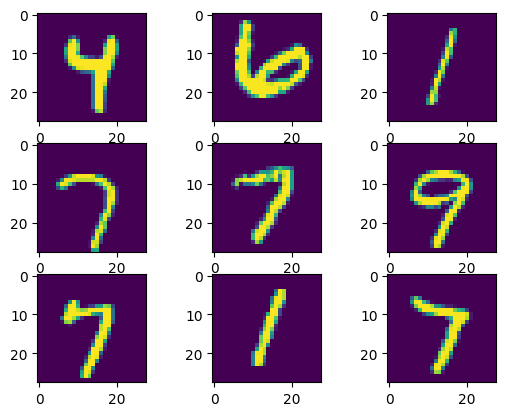

In [9]:
data_train = torchvision.datasets.MNIST(
    root='./datasets',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor())

data_test = torchvision.datasets.MNIST(
    root='./datasets',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor())

data_train_batched = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=batch_size,
    shuffle=True,
)
data_test_batched = torch.utils.data.DataLoader(
    dataset=data_test,
    batch_size=batch_size,
    shuffle=False, # not shuffling test
)

samples = iter(data_train_batched)
sample_images, sample_labels = next(samples)
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(sample_images[i][0])
plt.show()

In [10]:
model = MNISTClassifier(in_features, hidden_features, out_classes).to(device)
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
def get_test_accuracy(model, data_loader):
  total_samples = len(data_loader.dataset)
  correct_preds = 0
  with torch.no_grad():
    for batch_num, (samples, targets) in enumerate(data_loader):
      samples = samples.reshape(-1, in_features).to(device)
      targets = targets.to(device)

      logits = model(samples)
      _, pred_targets = torch.max(logits, 1)
      correct_preds += (pred_targets == targets).sum().item()
  print(f'Test Accuracy on {total_samples} samples: {correct_preds/total_samples}')


get_test_accuracy(model, data_test_batched)

total_batches = len(data_train_batched)
for epoch in range(epochs):
  for batch_num, (images, labels) in enumerate(data_train_batched):
    images = images.reshape(-1, in_features).to(device)
    labels = labels.to(device)

    pred = model(images)
    loss = lossFn(pred, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (batch_num + 1) % 100 == 0:
      print(f'[Epoch {epoch + 1}/{epochs}] {batch_num+1}/{total_batches} => loss: {loss.item()}')
  get_test_accuracy(model, data_test_batched)

Test Accuracy on 10000 samples: 0.046
[Epoch 1/2] 100/600 => loss: 0.281314879655838
[Epoch 1/2] 200/600 => loss: 0.11806855350732803
[Epoch 1/2] 300/600 => loss: 0.2878216505050659
[Epoch 1/2] 400/600 => loss: 0.2048536241054535
[Epoch 1/2] 500/600 => loss: 0.15692299604415894
[Epoch 1/2] 600/600 => loss: 0.038175616413354874
Test Accuracy on 10000 samples: 0.9584
[Epoch 2/2] 100/600 => loss: 0.05336611345410347
[Epoch 2/2] 200/600 => loss: 0.19842220842838287
[Epoch 2/2] 300/600 => loss: 0.043401770293712616
[Epoch 2/2] 400/600 => loss: 0.06288804858922958
[Epoch 2/2] 500/600 => loss: 0.08642572164535522
[Epoch 2/2] 600/600 => loss: 0.06701063364744186
Test Accuracy on 10000 samples: 0.9685


In [12]:
## Neural Networks - Flowers102 grayscale

# idx to cat mapping
categories = [
    "pink primrose",
    "globe thistle",
    "blanket flower",
    "trumpet creeper",
    "blackberry lily",
    "snapdragon",
    "colt's foot",
    "king protea",
    "spear thistle",
    "yellow iris",
    "globe-flower",
    "purple coneflower",
    "peruvian lily",
    "balloon flower",
    "hard-leaved pocket orchid",
    "giant white arum lily",
    "fire lily",
    "pincushion flower",
    "fritillary",
    "red ginger",
    "grape hyacinth",
    "corn poppy",
    "prince of wales feathers",
    "stemless gentian",
    "artichoke",
    "canterbury bells",
    "sweet william",
    "carnation",
    "garden phlox",
    "love in the mist",
    "mexican aster",
    "alpine sea holly",
    "ruby-lipped cattleya",
    "cape flower",
    "great masterwort",
    "siam tulip",
    "sweet pea",
    "lenten rose",
    "barbeton daisy",
    "daffodil",
    "sword lily",
    "poinsettia",
    "bolero deep blue",
    "wallflower",
    "marigold",
    "buttercup",
    "oxeye daisy",
    "english marigold",
    "common dandelion",
    "petunia",
    "wild pansy",
    "primula",
    "sunflower",
    "pelargonium",
    "bishop of llandaff",
    "gaura",
    "geranium",
    "orange dahlia",
    "tiger lily",
    "pink-yellow dahlia",
    "cautleya spicata",
    "japanese anemone",
    "black-eyed susan",
    "silverbush",
    "californian poppy",
    "osteospermum",
    "spring crocus",
    "bearded iris",
    "windflower",
    "moon orchid",
    "tree poppy",
    "gazania",
    "azalea",
    "water lily",
    "rose",
    "thorn apple",
    "morning glory",
    "passion flower",
    "lotus",
    "toad lily",
    "bird of paradise",
    "anthurium",
    "frangipani",
    "clematis",
    "hibiscus",
    "columbine",
    "desert-rose",
    "tree mallow",
    "magnolia",
    "cyclamen",
    "watercress",
    "monkshood",
    "canna lily",
    "hippeastrum",
    "bee balm",
    "ball moss",
    "foxglove",
    "bougainvillea",
    "camellia",
    "mallow",
    "mexican petunia",
    "bromelia",
]

100%|██████████| 344862509/344862509 [00:13<00:00, 25273202.67it/s]


Extracting datasets/flowers-102/102flowers.tgz to datasets/flowers-102


100%|██████████| 502/502 [00:00<00:00, 617641.72it/s]


100%|██████████| 14989/14989 [00:00<00:00, 13780890.54it/s]


label: 11 (cat: purple coneflower)
label: 62 (cat: black-eyed susan)
label: 18 (cat: fritillary)
label: 90 (cat: watercress)
label: 81 (cat: anthurium)
label: 73 (cat: water lily)
label: 86 (cat: desert-rose)
label: 46 (cat: oxeye daisy)
label: 47 (cat: english marigold)


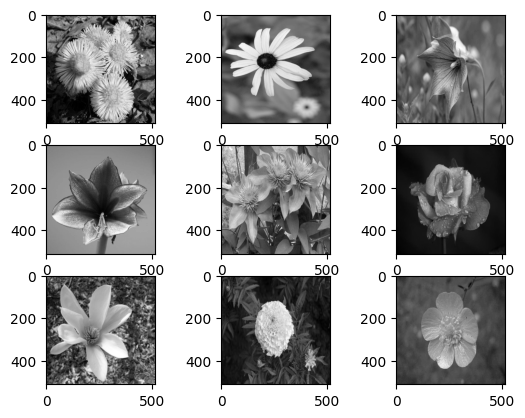

In [13]:
# params
batch_size = 100
image_size = (512, 512)
in_features = image_size[0] * image_size[1]
out_classes = 102

dataset_train = torchvision.datasets.Flowers102(
    root="./datasets",
    split="train",
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Grayscale(),
        torchvision.transforms.Resize(image_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5), (0.5))
    ])
)
dataset_test = torchvision.datasets.Flowers102(
    root="./datasets",
    split="test",
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Grayscale(),
        torchvision.transforms.Resize(image_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5), (0.5))
    ])
)

dataloader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=batch_size,
    shuffle=True,
)
dataloader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=batch_size,
    shuffle=False,
)

sample_images, sample_labels = next(iter(dataloader_train))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(sample_images[i][0], cmap='gray')
  print(f"label: {sample_labels[i]} (cat: {categories[sample_labels[i]]})")
plt.show()

In [14]:
class Flowers102GrayScaleNN(nn.Module):
  def __init__(self, in_features, hidden_features_1, hidden_features_2, out_classes):
    super().__init__()
    self.lin1 = nn.Linear(in_features, hidden_features_1)
    self.lin2 = nn.Linear(hidden_features_1, hidden_features_2)
    self.lin3 = nn.Linear(hidden_features_2, out_classes)

  def forward(self, x):
    x = nn.functional.relu(self.lin1(x))
    x = nn.functional.relu(self.lin2(x))
    x = self.lin3(x)
    return x


In [15]:
# params
hidden_features_1 = 2048
hidden_features_2 = 512
learning_rate = 1e-2
epochs = 20

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Flowers102GrayScaleNN(in_features, hidden_features_1, hidden_features_2, out_classes).to(device)
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
def get_test_accuracy(model, dataloader):
  total_samples = len(dataloader.dataset)
  correct_preds = 0
  with torch.no_grad():
    for samples, labels in dataloader:
      samples = samples.reshape(-1, in_features).to(device)
      labels = labels.to(device)

      logits = model(samples)
      _, pred_labels = torch.max(logits, 1)
      correct_preds += (pred_labels == labels).sum().item()
  print(f"Test Accuracy = {correct_preds/total_samples} on {total_samples} samples")

In [17]:
get_test_accuracy(model, dataloader_test)

progress_report_step_size = 100 # high value to disable logging within epochs
total_batches = len(dataloader_train)
for epoch in range(epochs):
  running_loss = 0.0
  for batch_num, (samples, labels) in enumerate(dataloader_train):
    samples = samples.reshape(-1, in_features).to(device)
    labels = labels.to(device)

    logits = model(samples)
    loss = lossFn(logits, labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
    if (batch_num + 1) % progress_report_step_size == 0:
      print(f'[Epoch {epoch + 1}] {batch_num + 1}/{total_batches} Loss={loss.item()}')
  print(f'[Epoch {epoch + 1}/{epochs}] Loss = {running_loss/total_batches}')
get_test_accuracy(model, dataloader_test)


Test Accuracy = 0.006993006993006993 on 6149 samples
[Epoch 1/20] Loss = 1718.1047719608653
[Epoch 2/20] Loss = 320.2781184803356
[Epoch 3/20] Loss = 12.989382353695957
[Epoch 4/20] Loss = 4.651495413346724
[Epoch 5/20] Loss = 4.590535684065386
[Epoch 6/20] Loss = 4.589162523096258
[Epoch 7/20] Loss = 4.5569376945495605
[Epoch 8/20] Loss = 4.540634632110596
[Epoch 9/20] Loss = 4.548957781358198
[Epoch 10/20] Loss = 4.966030250896107
[Epoch 11/20] Loss = 4.58230564811013
[Epoch 12/20] Loss = 4.577537623318759
[Epoch 13/20] Loss = 4.525018908760765
[Epoch 14/20] Loss = 4.576047897338867
[Epoch 15/20] Loss = 4.557641072706743
[Epoch 16/20] Loss = 4.558786348863081
[Epoch 17/20] Loss = 4.559970899061724
[Epoch 18/20] Loss = 4.559497573158958
[Epoch 19/20] Loss = 4.5583297122608535
[Epoch 20/20] Loss = 4.542667475613681
Test Accuracy = 0.003903073670515531 on 6149 samples


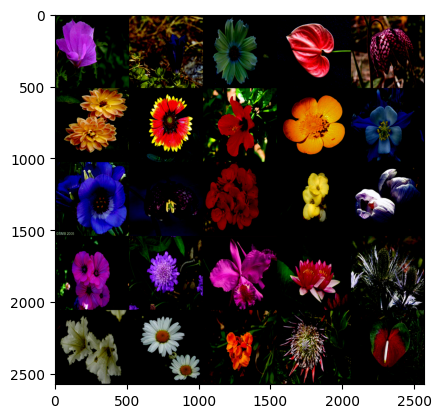

In [18]:
## Neural Networks - CNNs ##

# params
batch_size = 32
image_size = (512, 512)
in_features = image_size[0] * image_size[1]
out_classes = 102

dataset_train = torchvision.datasets.Flowers102(
    root="./datasets",
    split="train",
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize(image_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)
dataset_test = torchvision.datasets.Flowers102(
    root="./datasets",
    split="test",
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize(image_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

dataloader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=batch_size,
    shuffle=True,
)
dataloader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=batch_size,
    shuffle=False,
)

sample_images, sample_labels = next(iter(dataloader_train))
img_grid = torchvision.utils.make_grid(sample_images[0:25], nrow=5)
plt.imshow(np.transpose(img_grid.numpy(), (1, 2, 0)))
plt.show()

In [19]:
class Flowers102CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.cov1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.cov2 = nn.Conv2d(32, 64, 3)
    self.cov3 = nn.Conv2d(64, 64, 3)
    self.lin1 = nn.Linear(64 * 16 * 31 * 31, 64)
    self.lin2 = nn.Linear(64, 102)


  def forward(self, x):
    x = self.pool(nn.functional.relu(self.cov1(x)))
    x = self.pool(nn.functional.relu(self.cov2(x)))
    x = nn.functional.relu(self.cov3(x))
    x = torch.flatten(x, 1)
    x = nn.functional.relu(self.lin1(x))
    x = self.lin2(x)
    return x


In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate = 1e-3


model = Flowers102CNN().to(device)
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
def get_test_accuracy(model, dataloader):
  total_samples = len(dataloader.dataset)
  correct_preds = 0
  with torch.no_grad():
    for samples, labels in dataloader:
      samples = samples.to(device)
      labels = labels.to(device)

      logits = model(samples)
      _, pred_labels = torch.max(logits, 1)
      correct_preds += (pred_labels == labels).sum().item()
  print(f"Test Accuracy = {correct_preds/total_samples} on {total_samples} samples")

In [22]:
get_test_accuracy(model, dataloader_test)

epochs = 20
progress_report_step_size = 100

total_batches = len(dataloader_train)
for epoch in range(epochs):
  running_loss = 0.0
  for batch_num, (samples, labels) in enumerate(dataloader_train):
    samples = samples.to(device)
    labels = labels.to(device)

    logits = model(samples)
    loss = lossFn(logits, labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
    if (batch_num + 1) % progress_report_step_size == 0:
      print(f'[Epoch {epoch + 1}/{epochs}] {batch_num + 1}/{total_batches} Loss={loss.item()}')
  print(f'[Epoch {epoch +1 }/{epochs}] Loss = {running_loss/total_batches}')
get_test_accuracy(model, dataloader_test)


Test Accuracy = 0.004553585948934786 on 6149 samples
[Epoch 1/20] Loss = 5.045634567737579
[Epoch 2/20] Loss = 4.628673151135445
[Epoch 3/20] Loss = 4.627772331237793
[Epoch 4/20] Loss = 4.61854413151741
[Epoch 5/20] Loss = 4.169563747942448
[Epoch 6/20] Loss = 1.7498428896069527
[Epoch 7/20] Loss = 0.44819296803325415
[Epoch 8/20] Loss = 0.16249537000840064
[Epoch 9/20] Loss = 0.08560008510858097
[Epoch 10/20] Loss = 0.037229358713375404
[Epoch 11/20] Loss = 0.006933061617871772
[Epoch 12/20] Loss = 0.004808845118674299
[Epoch 13/20] Loss = 0.0046536655822251305
[Epoch 14/20] Loss = 0.004572619678825163
[Epoch 15/20] Loss = 0.004459169586638723
[Epoch 16/20] Loss = 0.0042662786057974245
[Epoch 17/20] Loss = 0.014799688309437897
[Epoch 18/20] Loss = 0.007657005813754836
[Epoch 19/20] Loss = 0.005545767250524136
[Epoch 20/20] Loss = 0.004458135719573875
Test Accuracy = 0.02650837534558465 on 6149 samples


100%|██████████| 170498071/170498071 [00:01<00:00, 97399974.34it/s] 


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


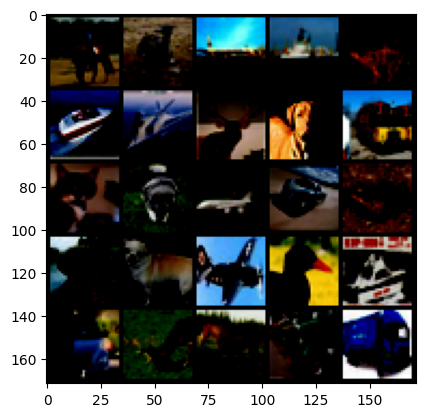

In [23]:
## Neural Networks - CNN for CIFAR10

# params
batch_size = 32
image_size = (128, 128)
in_features = image_size[0] * image_size[1]
out_classes = 102

dataset_train = torchvision.datasets.CIFAR10(
    root="./datasets",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        # torchvision.transforms.Resize(image_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)
dataset_test = torchvision.datasets.CIFAR10(
    root="./datasets",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        # torchvision.transforms.Resize(image_size),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

dataloader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=batch_size,
    shuffle=True,
)
dataloader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=batch_size,
    shuffle=False,
)

sample_images, sample_labels = next(iter(dataloader_train))
img_grid = torchvision.utils.make_grid(sample_images[0:25], nrow=5)
plt.imshow(np.transpose(img_grid.numpy(), (1, 2, 0)))
plt.show()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [24]:
class CIFAR10CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.cov1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.cov2 = nn.Conv2d(32, 64, 3)
    self.cov3 = nn.Conv2d(64, 64, 3)
    self.lin1 = nn.Linear(64*4*4, 64)
    self.lin2 = nn.Linear(64, 102)


  def forward(self, x):
    x = self.pool(nn.functional.relu(self.cov1(x)))
    x = self.pool(nn.functional.relu(self.cov2(x)))
    x = nn.functional.relu(self.cov3(x))
    x = torch.flatten(x, 1)
    x = nn.functional.relu(self.lin1(x))
    x = self.lin2(x)
    return x


In [25]:
learning_rate = 1e-3
epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CIFAR10CNN().to(device)
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
def get_test_accuracy(model, dataloader):
  total_samples = len(dataloader.dataset)
  correct_preds = 0
  with torch.no_grad():
    for samples, labels in dataloader:
      samples = samples.to(device)
      labels = labels.to(device)

      logits = model(samples)
      _, pred_labels = torch.max(logits, 1)
      correct_preds += (pred_labels == labels).sum().item()
  print(f"Test Accuracy = {correct_preds/total_samples} on {total_samples} samples")

In [27]:
get_test_accuracy(model, dataloader_test)

progress_report_step_size = 150

total_batches = len(dataloader_train)
for epoch in range(epochs):
  running_loss = 0.0
  for batch_num, (samples, labels) in enumerate(dataloader_train):
    samples = samples.to(device)
    labels = labels.to(device)

    logits = model(samples)
    loss = lossFn(logits, labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
    # if (batch_num + 1) % progress_report_step_size == 0:
    #   print(f'[Epoch {epoch + 1}/{epochs}] {batch_num + 1}/{total_batches} Loss={loss.item()}')
  print(f'[Epoch {epoch + 1}] Loss = {running_loss/total_batches}')
get_test_accuracy(model, dataloader_test)


Test Accuracy = 0.0996 on 10000 samples
[Epoch 1] Loss = 1.5731611381870618
[Epoch 2] Loss = 1.1662420173981827
[Epoch 3] Loss = 0.9878906998890604
[Epoch 4] Loss = 0.8796557809249453
[Epoch 5] Loss = 0.801342149461147
[Epoch 6] Loss = 0.739535459572889
[Epoch 7] Loss = 0.6904179026645036
[Epoch 8] Loss = 0.6520526013310263
[Epoch 9] Loss = 0.6121231638710238
[Epoch 10] Loss = 0.5836407900886206
Test Accuracy = 0.717 on 10000 samples
